In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
sns.set_style("whitegrid")
%matplotlib inline

In [25]:
df=pd.read_csv("student_habits_performance.csv")

# Data preprocessing and cleaning

In [26]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [27]:
df.shape

(1000, 16)

In [28]:
#check for missing value
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [29]:
#dropping the 
df.dropna(inplace=False)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [30]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [31]:
print("Unique values in part_time_job:", df['part_time_job'].unique())
print("Unique values in extracurricular_participation:", df['extracurricular_participation'].unique())
print("Unique values in diet_quality:", df['diet_quality'].unique())

Unique values in part_time_job: ['No' 'Yes']
Unique values in extracurricular_participation: ['Yes' 'No']
Unique values in diet_quality: ['Fair' 'Good' 'Poor']


In [32]:
#Datatype conversion
df['part_time_job'] = df['part_time_job'].map({'Yes': 1, 'No': 0})
df['extracurricular_participation'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})
diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
df['diet_quality'] = df['diet_quality'].map(diet_map)
print("Missing values after conversion:")
print(df[['part_time_job', 'extracurricular_participation', 'diet_quality']].isnull().sum())

Missing values after conversion:
part_time_job                    0
extracurricular_participation    0
diet_quality                     0
dtype: int64


In [33]:
# Check current missing values
print("\nMissing values in parental_education_level:", df['parental_education_level'].isnull().sum())
#Create an 'Unknown' category
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')
print("Missing values after treatment:", df['parental_education_level'].isnull().sum())


Missing values in parental_education_level: 91
Missing values after treatment: 0


In [34]:
print("\nFinal data types:")
print(df.dtypes)

print("\nFinal missing values:")
print(df.isnull().sum())

print("\nSample converted data:")
display(df[['part_time_job', 'extracurricular_participation', 'diet_quality', 'parental_education_level']].head())


Final data types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation      int64
exam_score                       float64
dtype: object

Final missing values:
student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_ho

,part_time_job,extracurricular_participation,diet_quality,parental_education_level
0,0,1,1,Master
1,0,0,2,High School
2,0,0,0,High School
3,0,1,0,Master
4,0,0,1,Master


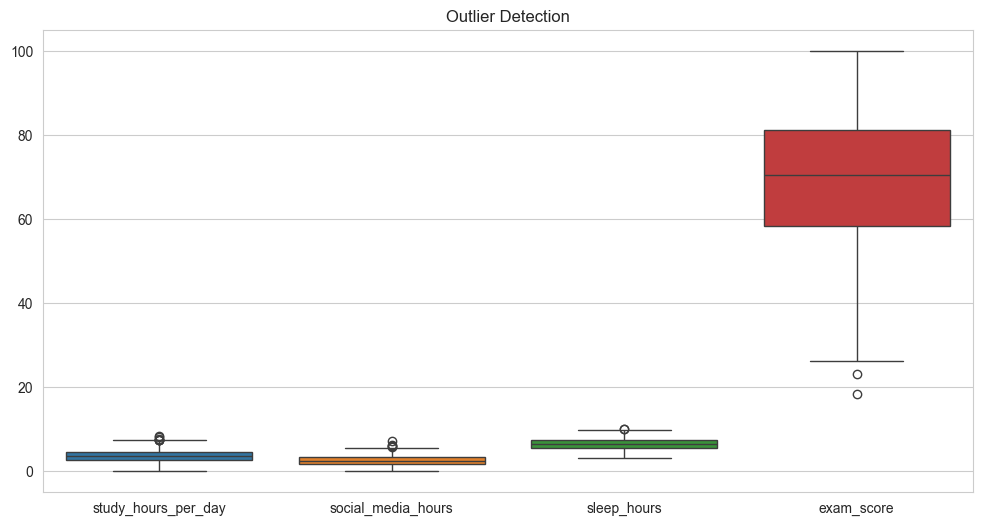

study_hours_per_day    7
social_media_hours     5
sleep_hours            2
exam_score             2
dtype: int64

In [16]:
#Outlier Detection
num_cols=['study_hours_per_day','social_media_hours','sleep_hours','exam_score']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Outlier Detection")
plt.show()

Q1=df[num_cols].quantile(0.25)
Q3=df[num_cols].quantile(0.75)
IQR=Q3-Q1
outliers=((df[num_cols]<(Q1-1.5*IQR))| ((df[num_cols]>Q3+1.5*IQR)))
outliers.sum()

In [35]:
display(df.describe().round(2))

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,0.22,84.13,6.47,1.19,3.04,5.44,0.32,69.60
std,2.31,1.47,1.17,1.08,0.41,9.40,1.23,0.73,2.03,2.85,0.47,16.89
min,17.00,0.00,0.00,0.00,0.00,56.00,3.20,0.00,0.00,1.00,0.00,18.40
25%,18.75,2.60,1.70,1.00,0.00,78.00,5.60,1.00,1.00,3.00,0.00,58.48
50%,20.00,3.50,2.50,1.80,0.00,84.40,6.50,1.00,3.00,5.00,0.00,70.50
75%,23.00,4.50,3.30,2.52,0.00,91.02,7.30,2.00,5.00,8.00,1.00,81.32
max,24.00,8.30,7.20,5.40,1.00,100.00,10.00,2.00,6.00,10.00,1.00,100.00


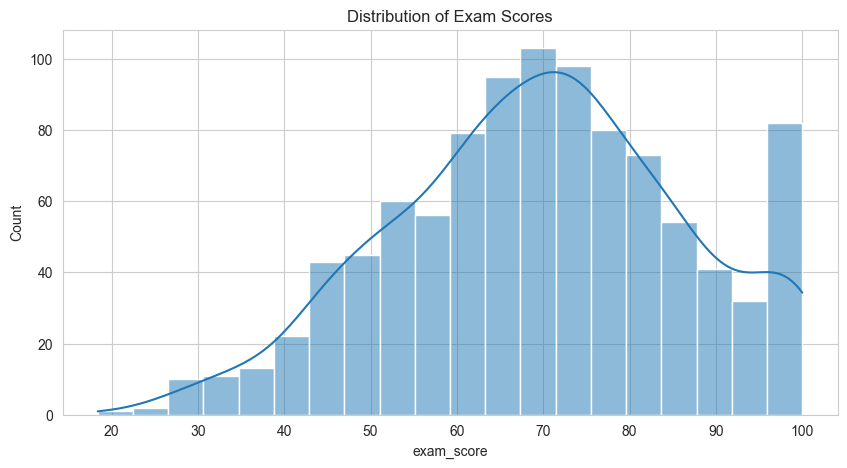

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['exam_score'],bins=20,kde=True)
plt.title("Distribution of Exam Scores")
plt.show()

# Correlation Analysis

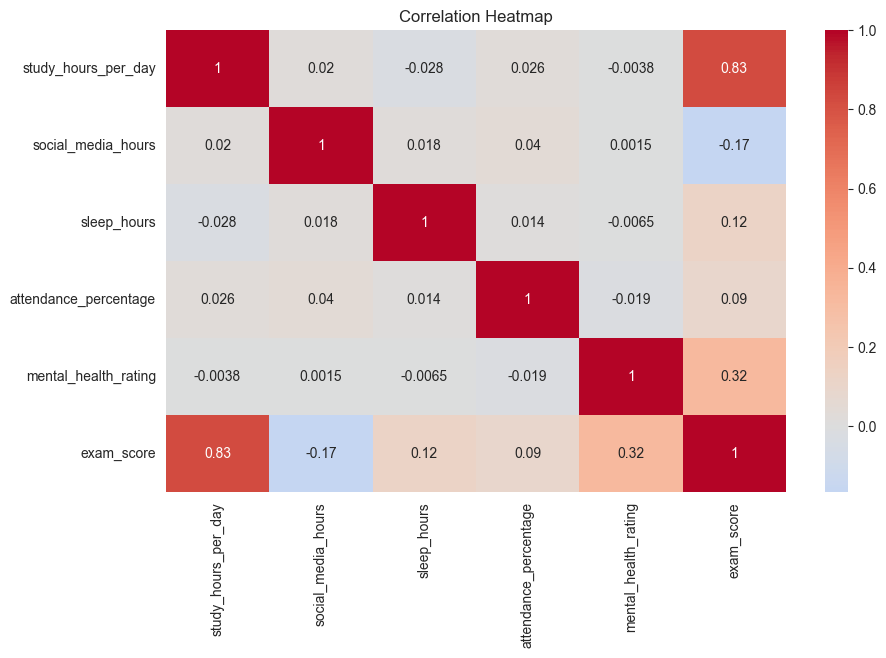

In [37]:
num_features = ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 
                'attendance_percentage', 'mental_health_rating', 'exam_score']

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [38]:
df['total_screen_time']=df['social_media_hours']+df['netflix_hours']
df['sleep_adequacy']=np.where(df['sleep_hours']>=7,1,0)
#1 if >=7 hrs
df['productivity_ratio']=df['study_hours_per_day']/(df['total_screen_time']+0.1)
df['performance_category']=pd.cut(df['exam_score'],bins=[0,60,80,100],labels=['Low','Medium','High'])

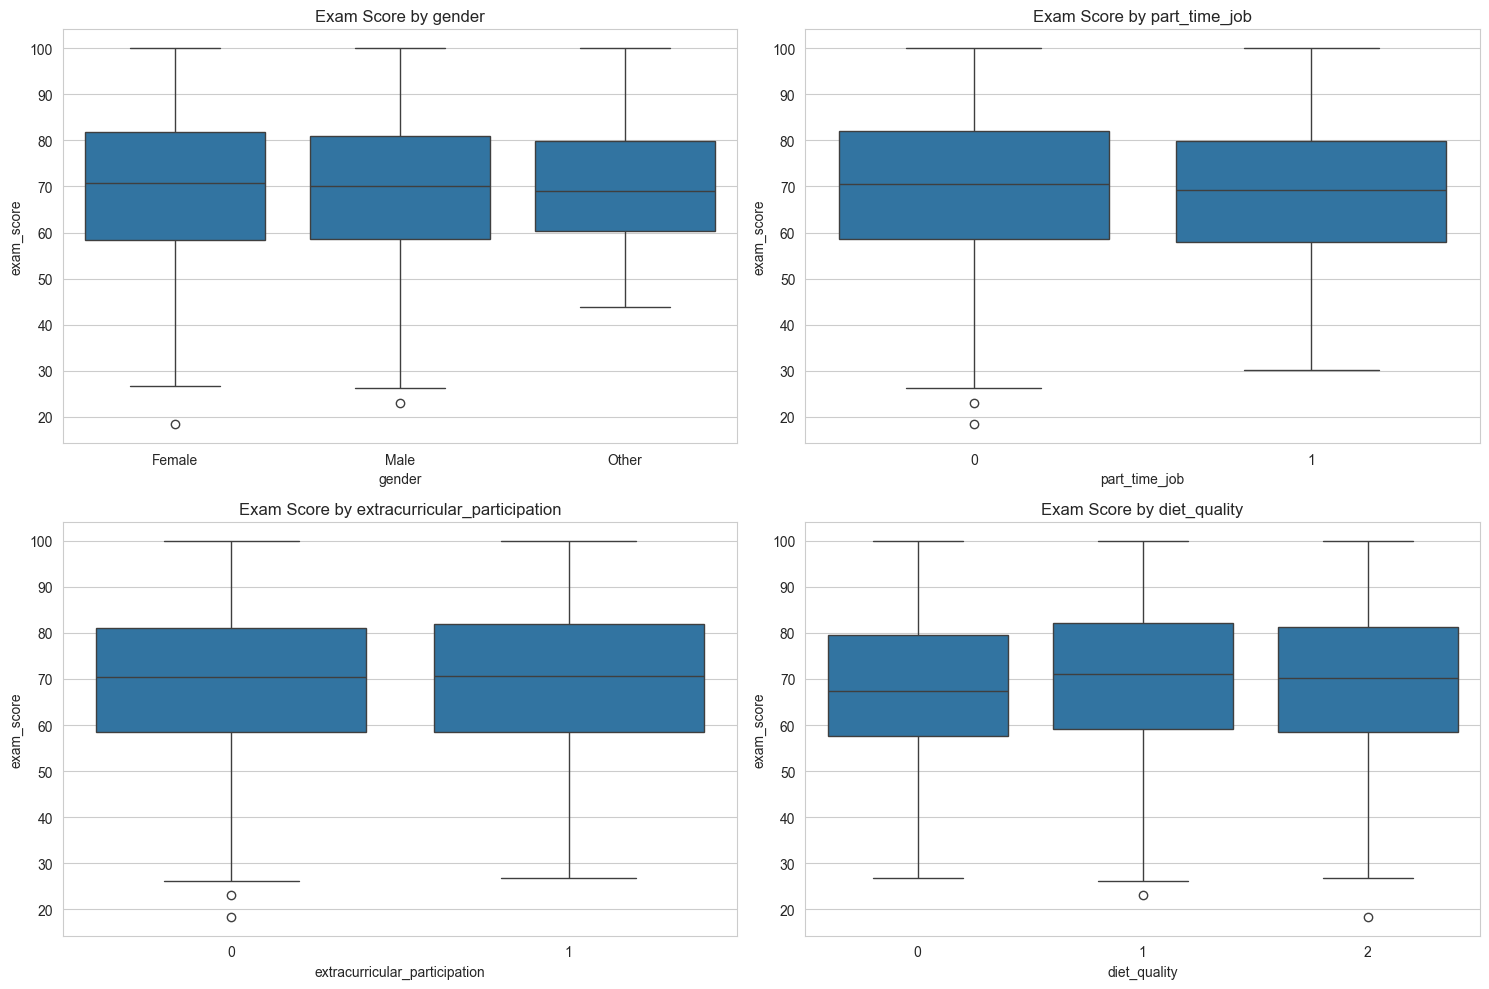

In [39]:
# Compare performance across categories
cat_cols = ['gender', 'part_time_job', 'extracurricular_participation', 'diet_quality']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='exam_score', data=df)
    plt.title(f"Exam Score by {col}")
plt.tight_layout()
plt.show()

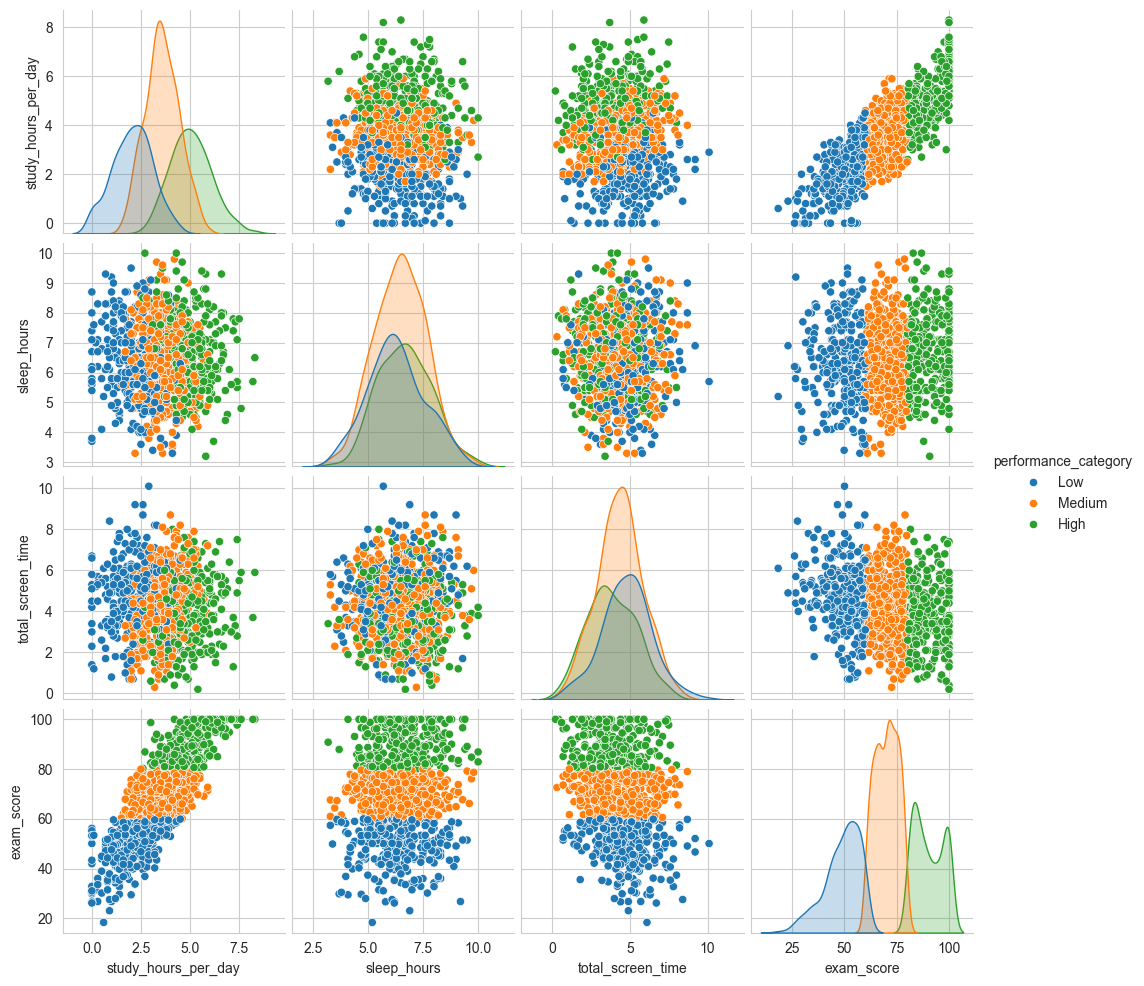

In [40]:
# Pairplot of key features
sns.pairplot(df, vars=['study_hours_per_day', 'sleep_hours', 
                      'total_screen_time', 'exam_score'],
             hue='performance_category', diag_kind='kde')
plt.show()

In [44]:
top_students=df[df['performance_category']=='High']
print("Top Performers Profile:")
print(f"- Avg Study Hours: {top_students['study_hours_per_day'].mean():.1f} hrs/day")
print(f"- Avg Sleep: {top_students['sleep_hours'].mean():.1f} hrs/night")
print(f"- Avg Screen Time: {top_students['total_screen_time'].mean():.1f} hrs/day")

low_students = df[df['performance_category'] == 'Low']
print("\nLow Performers Profile:")
print(f"- Avg Study Hours: {low_students['study_hours_per_day'].mean():.1f} hrs/day")
print(f"- Avg Sleep: {low_students['sleep_hours'].mean():.1f} hrs/night")
print(f"- Avg Screen Time: {low_students['total_screen_time'].mean():.1f} hrs/day")

Top Performers Profile:
- Avg Study Hours: 5.0 hrs/day
- Avg Sleep: 6.7 hrs/night
- Avg Screen Time: 3.8 hrs/day

Low Performers Profile:
- Avg Study Hours: 2.1 hrs/day
- Avg Sleep: 6.3 hrs/night
- Avg Screen Time: 4.8 hrs/day


# Modelling

# Regression Model

In [46]:
X = df.drop(['student_id', 'exam_score', 'performance_category'], axis=1)
y_reg = df['exam_score']  # For regression
y_clf = df['performance_category']  # For classification

# Define preprocessing
numeric_features = ['age', 'study_hours_per_day', 'social_media_hours', 
                   'netflix_hours', 'attendance_percentage', 'sleep_hours',
                   'exercise_frequency', 'mental_health_rating', 'total_screen_time',
                   'productivity_ratio']
categorical_features = ['gender', 'parental_education_level', 'internet_quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Random Forest Regressor

In [56]:

# Create and fit pipeline
reg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
reg_pipe.fit(X_train, y_reg_train)

# Make predictions
y_reg_pred = reg_pipe.predict(X_test)

# Evaluate
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print(" Regression Performance:")
print(f"- RMSE: {rmse:.2f}")  # Lower is better
print(f"- R² Score: {r2:.2f}")  # Closer to 1 is better

 Regression Performance:
- RMSE: 5.10
- R² Score: 0.90


# Classification Model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

clf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

clf_pipe.fit(X_train_clf, y_clf_train)
y_clf_pred = clf_pipe.predict(X_test_clf)

print("\n Regression Classification Performance:")
print(classification_report(y_clf_test, y_clf_pred))
print(f"Accuracy: {accuracy_score(y_clf_test, y_clf_pred):.2f}")


 Regression Classification Performance:
              precision    recall  f1-score   support

        High       0.81      0.84      0.83        45
         Low       0.87      0.94      0.91        51
      Medium       0.90      0.85      0.87       104

    accuracy                           0.87       200
   macro avg       0.86      0.88      0.87       200
weighted avg       0.87      0.87      0.87       200

Accuracy: 0.87


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit Random Forest pipeline
rf_clf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Added random_state for reproducibility
])

rf_clf_pipe.fit(X_train_clf, y_clf_train)

# Make predictions
y_rf_clf_pred = rf_clf_pipe.predict(X_test_clf)

# Evaluate performance
print("\n Random Forest Classification Performance:")
print(classification_report(y_clf_test, y_rf_clf_pred))
print(f"Accuracy: {accuracy_score(y_clf_test, y_rf_clf_pred):.2f}")


 Random Forest Classification Performance:
              precision    recall  f1-score   support

        High       0.80      0.80      0.80        45
         Low       0.86      0.86      0.86        51
      Medium       0.85      0.85      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Accuracy: 0.84


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipe.fit(X_train, y_reg_train)
y_rf_pred = rf_pipe.predict(X_test)

mse = mean_squared_error(y_reg_test, y_rf_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_reg_test, y_rf_pred)

print("\n Random Forest Regression:")
print(f"- RMSE: {rmse:.2f}")
print(f"- R² Score: {r2:.2f}")


 Random Forest Regression:
- RMSE: 6.24
- R² Score: 0.85


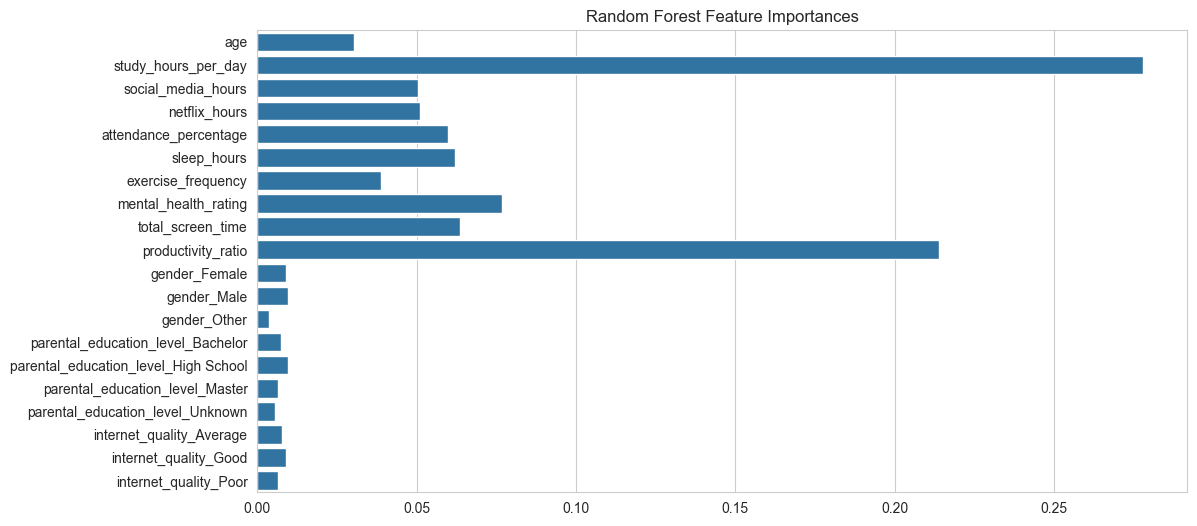

In [65]:
importances = rf_clf_pipe.named_steps['classifier'].feature_importances_
features = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Random Forest Feature Importances")
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clf, y_clf_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best accuracy: 0.7975


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create pipeline with best parameters
optimized_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        min_samples_split=5,
        max_depth=None,  # None means nodes expand until all leaves are pure
        random_state=42
    ))
])

# Train the model
optimized_rf.fit(X_train_clf, y_clf_train)

# Make predictions
y_pred_optimized = optimized_rf.predict(X_test_clf)

# Evaluate performance
print("\n🌲 Optimized Random Forest Performance:")
print(classification_report(y_clf_test, y_pred_optimized))
print(f"Accuracy: {accuracy_score(y_clf_test, y_pred_optimized):.2f}")


🌲 Optimized Random Forest Performance:
              precision    recall  f1-score   support

        High       0.83      0.84      0.84        45
         Low       0.88      0.84      0.86        51
      Medium       0.86      0.87      0.86       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.86       200

Accuracy: 0.85


In [76]:
low_performers = X_test[y_pred_optimized == 'Low']
print(f"Students needing intervention: {len(low_performers)}")

Students needing intervention: 49


In [89]:
# First select only numeric columns for median calculation
numeric_cols = ['study_hours_per_day', 'sleep_hours', 'total_screen_time']
high_achiever_profile = X_train[y_clf_train == 'High'][numeric_cols].median()

print("High performer habits (median values):")
print(high_achiever_profile)

# For numeric features
numeric_cols = ['study_hours_per_day', 'sleep_hours', 'total_screen_time', 'attendance_percentage']
numeric_profile = X_train[y_clf_train == 'High'][numeric_cols].median()

# For categorical features
categorical_cols = ['gender', 'parental_education_level'] 
categorical_profile = X_train[y_clf_train == 'High'][categorical_cols].mode().iloc[0]

print("\nHigh Performer Profile:")
print("\nNumeric Habits (median):")
print(numeric_profile)

print("\nCategorical Traits (most common):")
print(categorical_profile)

High performer habits (median values):
study_hours_per_day    5.0
sleep_hours            6.6
total_screen_time      3.7
dtype: float64

High Performer Profile:

Numeric Habits (median):
study_hours_per_day       5.0
sleep_hours               6.6
total_screen_time         3.7
attendance_percentage    85.8
dtype: float64

Categorical Traits (most common):
gender                           Female
parental_education_level    High School
Name: 0, dtype: object


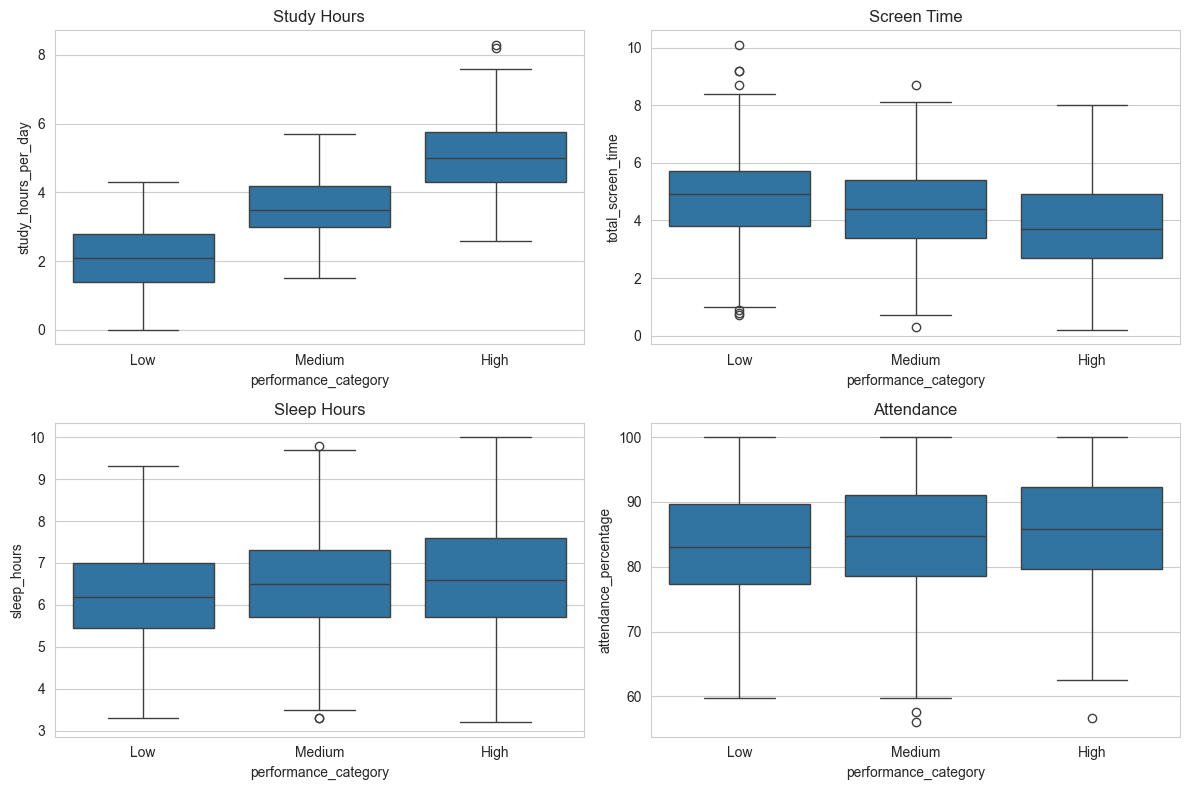

In [96]:
plt.figure(figsize=(12,8))

# Plot 1: Study Hours
plt.subplot(2,2,1)
sns.boxplot(x=y_clf_train, y=X_train['study_hours_per_day'])
plt.title("Study Hours")

# Plot 2: Screen Time
plt.subplot(2,2,2)
sns.boxplot(x=y_clf_train, y=X_train['total_screen_time'])
plt.title("Screen Time")

# Plot 3: Sleep Hours
plt.subplot(2,2,3)
sns.boxplot(x=y_clf_train, y=X_train['sleep_hours'])
plt.title("Sleep Hours")

# Plot 4: Attendance
plt.subplot(2,2,4)
sns.boxplot(x=y_clf_train, y=X_train['attendance_percentage'])
plt.title("Attendance")

plt.tight_layout()
plt.savefig('performance_comparison.png')  # Save for reports
plt.show()